In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
from datetime import datetime
import json
import statistics
import matplotlib.pyplot as plt
from matplotlib import lines
import seaborn as sbn
import math

#import csv

#----------------------------------------------------------------------
# IMPORTA OS DADOS DAS ESTEIRAS EM UM DICT JSON
#----------------------------------------------------------------------
def Carrega_Esteira():
    url = "https://dry-plateau-13546.herokuapp.com/esteira"
    response = urlopen(url)

    dict_json = json.loads(response.read())
    return pd.DataFrame(dict_json['rows'])
    
#-----------------------------------------------------------------------
# CRIA UMA LISTA COM TODOS OS REGISTROS DE DETALHES DE TODAS AS ESTEIRAS
#-----------------------------------------------------------------------
def Obtem_Detalhes():
    lista_entradas = []
    detalhes = json_pd['detalhes']
    total = 0
    for sub_detalhes in detalhes:
        for entrada in sub_detalhes:
            dict_entradas = {}
            dict_entradas.setdefault('esteira_id',entrada['esteira_id'])
            dict_entradas.setdefault('id',entrada['id'])
            dict_entradas.setdefault('v_rolo',entrada['velocidade_rolo'])
            dict_entradas.setdefault('v_esteira',entrada['velocidade_esteira'])
            dict_entradas.setdefault('data',datetime.strptime(entrada['timestamp'][0:10], '%Y-%m-%d').date())
            dict_entradas.setdefault('hora',datetime.strptime(entrada['timestamp'][11:19], '%H:%M:%S').time())
            lista_entradas.append(dict_entradas)
        total = total + len(sub_detalhes)
    
    #print("Total de registros nos detalhes = ",total)
    return pd.DataFrame(lista_entradas)

#----------------------------------------------------------------------
# OBTEM AS ESTATISTICAS DA VELOCIDADE DOS ROLOS DAS ESTEIRAS
#----------------------------------------------------------------------
def Estatistica_esteiras_rolo(num_esteira=0):
    def Criar_dict(i):
        dict = {}
        dict.setdefault('esteira_id',(i+1))
        dict.setdefault('v_max',rolo.max())
        dict.setdefault('v_min',rolo.min())
        dict.setdefault('v_media',rolo.mean())
        dict.setdefault('v_dpadrao',rolo.std())
        dict.setdefault('v_mediana',np.median(rolo))
        dict.setdefault('v_moda',statistics.mode(rolo))
        return dict

    def imprimir(dict):
        print("--------------------------------------------------")
        print("ESTATISTICA DOS ROLOS DA ESTEIRA No.: ",dict['esteira_id'])
        print("--------------------------------------------------")
        print(f"Maior velocidade do rolo = {dict['v_max']: <5.2f}")
        print(f"Menor velocidade do rolo = {dict['v_min']: <5.2f}")
        print(f"Velocidade média         = {dict['v_media']: <8.4f}")
        print(f"desvio padrao            = {dict['v_dpadrao']: <8.4f}")
        print(f"Mediana                  = {dict['v_mediana']: <5.2f}")       
        print(f"Moda                     = {dict['v_moda']: <5.2f}")       

    lista = []
    
    if num_esteira == 0:
        m = detalhes_pd['esteira_id'].max()
        for i in range(m):
            filtro = detalhes_pd[detalhes_pd['esteira_id'] == (i + 1)]
            rolo = np.array(filtro['v_rolo'])          
            dict = Criar_dict(i)
            lista.append(dict)
            #imprimir(dict)
    else:
        filtro = detalhes_pd[detalhes_pd['esteira_id'] == (num_esteira)]
        rolo = np.array(filtro['v_rolo'])
        i = num_esteira - 1        
        dict = Criar_dict(i)
        lista.append(dict)
        #imprimir(dict)

    return pd.DataFrame(lista)

#----------------------------------------------------------------------
# OBTEM AS ESTATISTICAS DAS VELOCIDADES DAS ESTEIRA
#----------------------------------------------------------------------
def Estatistica_esteiras(num_esteira=0):
    def Criar_dict(i):
        dict = {}
        dict.setdefault('esteira_id',(i+1))
        dict.setdefault('v_max',esteira.max())
        dict.setdefault('v_min',esteira.min())
        dict.setdefault('v_media',esteira.mean())
        dict.setdefault('v_dpadrao',esteira.std())
        dict.setdefault('v_mediana',np.median(esteira))
        dict.setdefault('v_moda',statistics.mode(esteira))
        dict.setdefault('q_registros',len(esteira))
        return dict

    def imprimir(dict):
        print("--------------------------------------------------")
        print("ESTATISTICA DA ESTEIRA No.: ",dict['esteira_id'])
        print("--------------------------------------------------")
        print(f"Maior velocidade da esteira = {dict['v_max']: <5.2f}")
        print(f"Menor velocidade da esteira = {dict['v_min']: <5.2f}")
        print(f"Velocidade média            = {dict['v_media']: <8.4f}")
        print(f"desvio padrao               = {dict['v_dpadrao']: <8.4f}")
        print(f"Mediana                     = {dict['v_mediana']: <5.2f}")       
        print(f"Moda                        = {dict['v_moda']: <5.2f}")       
        print(f"Qde de registros            = {dict['q_registros']: <5}")       

    lista = []

    if num_esteira == 0: # imprimir todas as esteiras
        m = detalhes_pd['esteira_id'].max()
        for i in range(m):
            filtro = detalhes_pd[detalhes_pd['esteira_id'] == (i + 1)]
            esteira = np.array(filtro['v_esteira'])
            dict = Criar_dict(i)
            lista.append(dict)
            #imprimir(dict)
    else:
        filtro = detalhes_pd[detalhes_pd['esteira_id'] == (num_esteira)]
        esteira = np.array(filtro['v_esteira'])
        i = num_esteira - 1
        dict = Criar_dict(i)
        lista.append(dict)
        #imprimir(dict)

    return pd.DataFrame(lista)

In [2]:
#----------------------------------------------------------------------
# SALVA ARQUIVO CSV PARA COMPARACAO
#----------------------------------------------------------------------
def Salva_CSV(nomearq,pd1):
    pd1.to_csv(nomearq,index=None)

In [3]:
def Exibir_Estatisticas():
    print("------------------------------------------------------------")
    print("QUANTIDADE DE ESTEIRAS REGISTRADAS: ",estat_esteira_pd['esteira_id'].max())
    print("------------------------------------------------------------")
    Estatisticas_gerais_rolo()
    Estatisticas_gerais_esteiras()

def Estatisticas_gerais_rolo():
    print("--------------------------------------------------------------------------------")
    print("               ESTATÍSTICAS GERAIS PARA ROLOS DAS ESTEIRAS")
    print("================================================================================")
    filtro = estat_rolo_pd[estat_rolo_pd['v_max'] == estat_rolo_pd['v_max'].max()]
    v = filtro['v_max'].max()
    id1 = filtro['esteira_id'].max()
    print(f'MAIOR VELOCIDADE registrada para rolos das esteiras        : {v: >6.2f} - esteira {id1}')
    print("--------------------------------------------------------------------------------")
    print(filtro)

    filtro = estat_rolo_pd[estat_rolo_pd['v_min'] == estat_rolo_pd['v_min'].min()]
    v = filtro['v_min'].min()
    id1 = filtro['esteira_id'].max()
    print("--------------------------------------------------------------------------------")
    print(f'MENOR VELOCIDADE registrada para rolos das esteiras        : {v: >6.2f} - esteira {id1}')
    print("--------------------------------------------------------------------------------")
    print(filtro)

    filtro = estat_rolo_pd[estat_rolo_pd['v_media'] == estat_rolo_pd['v_media'].max()]
    v = filtro['v_media'].max()
    id1 = filtro['esteira_id'].max()
    print("--------------------------------------------------------------------------------")
    print(f'MELHOR VELOCIDADE MÉDIA registrada para rolos das esteiras : {v: >6.2f} - esteira {id1}')
    print("--------------------------------------------------------------------------------")
    print(filtro)

    filtro = estat_rolo_pd[estat_rolo_pd['v_moda'] == estat_rolo_pd['v_moda'].max()]
    v = filtro['v_moda'].max()
    id1 = filtro['esteira_id'].max()
    print("--------------------------------------------------------------------------------")
    print(f'VELOCIDADE MAIS FREQUENTE para rolos das esteiras          : {v: >6.2f} - esteira {id1}')
    print("--------------------------------------------------------------------------------")
    print(filtro)

    filtro = estat_rolo_pd[estat_rolo_pd['v_dpadrao'] == estat_rolo_pd['v_dpadrao'].min()]
    v = filtro['v_dpadrao'].min()
    id1 = filtro['esteira_id'].max()
    print("--------------------------------------------------------------------------------")
    print(f'Rolo da Esteira com MENOR DESVIO PADRÃO na velocidade      : {v: >6.2f} - esteira {id1}')
    print("--------------------------------------------------------------------------------")
    print(filtro)

def Estatisticas_gerais_esteiras():
    print("-----------------------------------------------------------------------")
    print("              ESTATÍSTICAS GERAIS PARA AS ESTEIRAS")
    print("=======================================================================")
    filtro = estat_esteira_pd[estat_esteira_pd['v_max'] == estat_esteira_pd['v_max'].max()]
    v = filtro['v_max'].max()
    id1 = filtro['esteira_id'].max()
    print(f'MAIOR VELOCIDADE registrada para esteiras        : {v: >6.2f} - esteira {id1}')
    print("-----------------------------------------------------------------------")
    print(filtro)

    filtro = estat_esteira_pd[estat_esteira_pd['v_min'] == estat_esteira_pd['v_min'].min()]
    v = filtro['v_min'].min()
    id1 = filtro['esteira_id'].max()
    print("-----------------------------------------------------------------------")
    print(f'MENOR VELOCIDADE registrada para esteiras        : {v: >6.2f} - esteira {id1}')
    print("-----------------------------------------------------------------------")
    print(filtro)

    filtro = estat_esteira_pd[estat_esteira_pd['v_media'] == estat_esteira_pd['v_media'].max()]
    v = filtro['v_media'].max()
    id1 = filtro['esteira_id'].max()
    print("-----------------------------------------------------------------------")
    print(f'MELHOR VELOCIDADE MÉDIA registrada para esteiras : {v: >6.2f} - esteira {id1}')
    print("-----------------------------------------------------------------------")
    print(filtro)

    filtro = estat_esteira_pd[estat_esteira_pd['v_moda'] == estat_esteira_pd['v_moda'].max()]
    v = filtro['v_moda'].max()
    id1 = filtro['esteira_id'].max()
    print("-----------------------------------------------------------------------")
    print(f'VELOCIDADE MAIS FREQUENTE para esteiras          : {v: >6.2f} - esteira {id1}')
    print("-----------------------------------------------------------------------")
    print(filtro)

    filtro = estat_esteira_pd[estat_esteira_pd['v_dpadrao'] == estat_esteira_pd['v_dpadrao'].min()]
    v = filtro['v_dpadrao'].min()
    id1 = filtro['esteira_id'].max()
    print("-----------------------------------------------------------------------")
    print(f'Esteira com MENOR DESVIO PADRÃO na velocidade    : {v: >6.2f} - esteira {id1}')
    print("-----------------------------------------------------------------------")
    print(filtro)

    filtro = estat_esteira_pd[estat_esteira_pd['q_registros'] == estat_esteira_pd['q_registros'].max()]
    v = filtro['q_registros'].max()
    id1 = filtro['esteira_id'].max()
    print("-----------------------------------------------------------------------")
    print(f'Esteira MAIS UTILIZADA                           : {v: >6} - esteira {id1}')
    print("-----------------------------------------------------------------------")
    print(filtro)

    filtro = estat_esteira_pd[estat_esteira_pd['q_registros'] == estat_esteira_pd['q_registros'].min()]
    v = filtro['q_registros'].min()
    id1 = filtro['esteira_id'].max()
    print("-----------------------------------------------------------------------")
    print(f'Esteira MENOS UTILIZADA                          : {v: >6} - esteira {id1}')
    print("-----------------------------------------------------------------------")
    print(filtro)        

In [4]:
def Graficos(df):
    plt.subplots(figsize=(20,10))

    plt.bar(df.index+1,df['v_max'],width=0.7,align='center')
    plt.title("VELOCIDADES MÁXIMAS DAS ESTEIRAS", fontdict={'fontsize':25})
    plt.xlabel("ESTEIRAS", fontdict={'fontsize':20})
    plt.ylabel("VELOCIDADES", fontdict={'fontsize':20})
    plt.show()

In [5]:
def Graficos_Barras(titulo,df):
    f, bar = plt.subplots(figsize=(15,9))

    valores_x = np.array(df['esteira_id'])
    valores_ymax = np.array(df['v_max'])
    valores_ymed = np.array(df['v_media'])
    valores_ymin = np.array(df['v_min'])

    bar = sbn.barplot(x=valores_x, y=valores_ymax, data=df, color = "Blue", label="Máximas")
    bar = sbn.barplot(x=valores_x, y=valores_ymed, data=df, color = "Orange", label="Médias")
    bar = sbn.barplot(x=valores_x, y=valores_ymin, data=df, color = "Red", label="Mínimas")
    
    bar.set_title(titulo, fontdict={'family': 'tahoma','fontsize':20}, loc='center')
    bar.set_xticks(np.arange(0, max(valores_x), step=5))
    bar.set_yticks(np.arange(0, max(valores_ymax)+2, step=2))
    bar.set_xlabel("ESTEIRAS", fontdict={'family': 'tahoma','fontsize':16}, loc='center')
    bar.set_ylabel("VELOCIDADES", fontdict={'family': 'tahoma','fontsize':16}, loc='center')
    bar.legend(prop = {'size' : 12}, loc = 'upper left', shadow = True, facecolor = 'grey',bbox_to_anchor = (1.0, 0.6)) 

    for j in np.arange(0,max(valores_ymax)+2,2):
        bar.axhline(y=j, xmin=0, color="Black", linewidth=0.3)


findfont: Font family ['tahoma'] not found. Falling back to DejaVu Sans.
findfont: Font family ['tahoma'] not found. Falling back to DejaVu Sans.


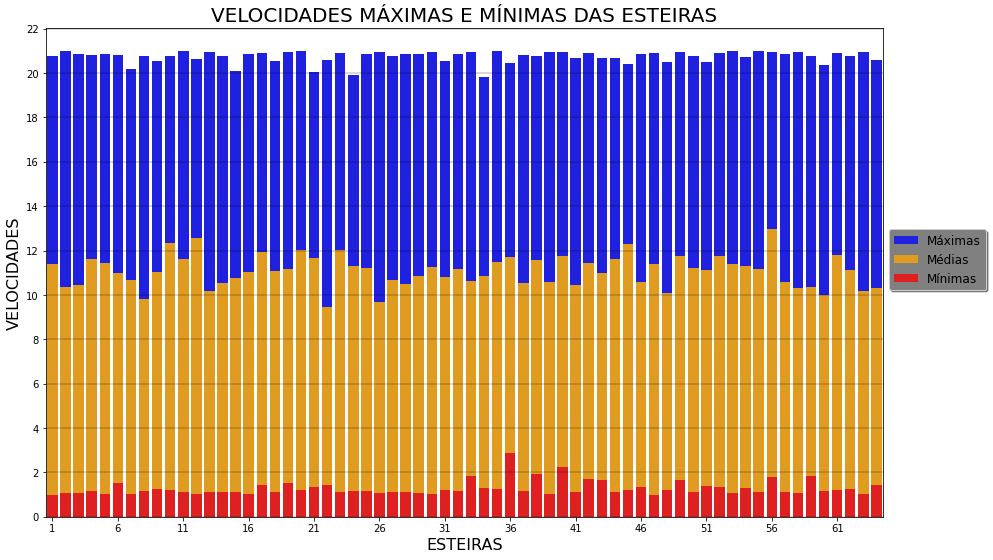

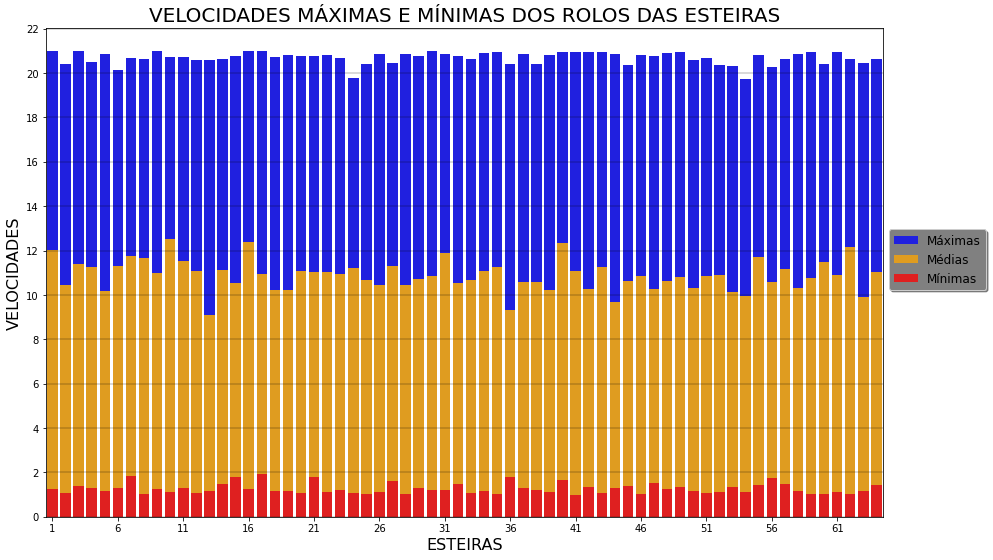

In [6]:
#----------------------------------------------------------------------
# ROTINA PRINCIPAL
#----------------------------------------------------------------------
json_pd = Carrega_Esteira()

# Cria uma lista contendo todos os detalhes de todas as esteiras e a salva em um

detalhes_pd = Obtem_Detalhes()
Salva_CSV('detalhes_todos.csv',detalhes_pd) # arquivo csv para conferencia. Essa linha pode ser excluída

estat_rolo_pd = Estatistica_esteiras_rolo() # ZERO ou VAZIO para exibir todas as esteiras
Salva_CSV('estatisticas_rolos.csv',estat_rolo_pd) # arquivo csv para conferencia. Essa linha pode ser excluída

estat_esteira_pd = Estatistica_esteiras() # ZERO ou VAZIO para exibir todas as esteiras
Salva_CSV('estatisticas_esteiras.csv',estat_esteira_pd) # arquivo csv para conferencia. Essa linha pode ser excluída

#Exibir_Estatisticas()

Graficos_Barras('VELOCIDADES MÁXIMAS E MÍNIMAS DAS ESTEIRAS',estat_esteira_pd)
Graficos_Barras("VELOCIDADES MÁXIMAS E MÍNIMAS DOS ROLOS DAS ESTEIRAS",estat_rolo_pd)